<a href="https://colab.research.google.com/github/LH-1169213/Equipo3/blob/main/Arboldedecision_Equipo3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Maestría en Inteligencia Artificial Aplicada**
##**Curso: Inteligencia Artificial y Aprendizaje Automático**
###Tecnológico de Monterrey
###Prof Luis Eduardo Falcón Morales

## **Adtividad de la Semana 6**
###**Árboles de decisión y bosque aleatorio.**


**Nombres y matrículas de los integrantes del equipo:**

*   Samara García González A01273001

*   Laura Elena Hernández Mata A01169213
*   Evelyn Aylin Rendon Medina A01748750

*   Emmanuel González Calitl A01320739
*   


En cada sección deberás incluir todas las líneas de código necesarias para responder a cada uno de los ejercicios.

In [1]:
# Incluye aquí todos módulos, librerías y paquetes que requieras.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt #borrar si no se usa
import seaborn as sns #borrar si no se usa

from sklearn.pipeline import Pipeline
from sklearn.model_selection import KFold
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import power_transform
from sklearn.preprocessing import FunctionTransformer


from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler  
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split # Xtv, Xtest, ytv, ytest = train_test_split(X, y, test_size=0.15, random_state=0)
from sklearn.preprocessing import StandardScaler   #borrar si no se usa
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import learning_curve, validation_curve
from sklearn.model_selection import  cross_validate

from sklearn.preprocessing import OneHotEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

from sklearn.metrics import recall_score #SÓLO PARA VALIDACIÓN
from sklearn.metrics import f1_score #SÓLO PARA VALIDACIÓN
from sklearn.metrics import make_scorer #SÓLO PARA VALIDACIÓN
from imblearn.metrics import geometric_mean_score #SÓLO PARA VALIDACIÓN
from sklearn.metrics import confusion_matrix #SÓLO PARA VALIDACIÓN

from sklearn import svm, datasets #borrar si no se usa
from sklearn.model_selection import GridSearchCV


#**Ejercicio-1.** 

## Carga los datos

In [2]:
#OBTENIENDO DATASET
DataOriginal = pd.read_csv("https://raw.githubusercontent.com/LH-1169213/Equipo3/main/SouthGermanCredit.asc",sep = " ")
DataOriginal.head()

,laufkont,laufzeit,moral,verw,hoehe,sparkont,beszeit,rate,famges,buerge,...,verm,alter,weitkred,wohn,bishkred,beruf,pers,telef,gastarb,kredit
0,1,18,4,2,1049,1,2,4,2,1,...,2,21,3,1,1,3,2,1,2,1
1,1,9,4,0,2799,1,3,2,3,1,...,1,36,3,1,2,3,1,1,2,1
2,2,12,2,9,841,2,4,2,2,1,...,1,23,3,1,1,2,2,1,2,1
3,1,12,4,0,2122,1,3,3,3,1,...,1,39,3,1,2,2,1,1,1,1
4,1,12,4,0,2171,1,3,4,3,1,...,2,38,1,2,2,2,2,1,1,1


## Sustituye los nombres de las columnas del alemán al inglés de acuerdo a como se indica en la página de la UCI.

In [3]:
#HACEMOS UNA COPIA PARA CAMBIAR HEADERS
df = DataOriginal
df = df.rename(columns={"laufkont":"status",
                        "laufzeit":"duration",
                        "moral":"credit_history",
                        "verw":"purpose",
                        "hoehe":"amount",
                        "sparkont":"savings",
                        "beszeit":"employment_duration",
                        "rate":"installment_rate",
                        "famges":"personal_status_sex",
                        "buerge":"other_debtors",
                        "wohnzeit":"present_residence",
                        "verm":"property",
                        "alter":"age",
                        "weitkred":"other_installment_plans",
                        "wohn":"housing",
                        "bishkred":"number_credits",
                        "beruf":"job",
                        "pers":"people_liable",
                        "telef":"telephone",
                        "gastarb":"foreign_worker",
                        "kredit":"credit_risk"})
df.head()

,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,personal_status_sex,other_debtors,...,property,age,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker,credit_risk
0,1,18,4,2,1049,1,2,4,2,1,...,2,21,3,1,1,3,2,1,2,1
1,1,9,4,0,2799,1,3,2,3,1,...,1,36,3,1,2,3,1,1,2,1
2,2,12,2,9,841,2,4,2,2,1,...,1,23,3,1,1,2,2,1,2,1
3,1,12,4,0,2122,1,3,3,3,1,...,1,39,3,1,2,2,1,1,1,1
4,1,12,4,0,2171,1,3,4,3,1,...,2,38,1,2,2,2,2,1,1,1


In [4]:
# CONOCIENDO EL DATASET
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   status                   1000 non-null   int64
 1   duration                 1000 non-null   int64
 2   credit_history           1000 non-null   int64
 3   purpose                  1000 non-null   int64
 4   amount                   1000 non-null   int64
 5   savings                  1000 non-null   int64
 6   employment_duration      1000 non-null   int64
 7   installment_rate         1000 non-null   int64
 8   personal_status_sex      1000 non-null   int64
 9   other_debtors            1000 non-null   int64
 10  present_residence        1000 non-null   int64
 11  property                 1000 non-null   int64
 12  age                      1000 non-null   int64
 13  other_installment_plans  1000 non-null   int64
 14  housing                  1000 non-null   int64
 15  numbe

#**Ejercicio-2.**

## Define como la variable X a todas las variables de entrada y a la variable Y como la variable de salida. 

In [5]:
# DEFINICIÓN DE VARIABLES

X = ["status","credit_history","purpose","savings","employment_duration" , "installment_rate", "personal_status_sex","other_debtors","property","job", "people_liable","age","other_installment_plans","housing", "amount","number_credits", "duration", "telephone","foreign_worker"]#Variables de entrada 
y = ["credit_risk"]#VARIABLE DE SALIDA


## Realiza una partición de los datos en el conjunto de entrenamiento del 85% y el de prueba de 15%.

In [6]:
# PARTICIÓN DE DATOS (ENTRENAMIENTO 85%, PRUEBA 15%)

Xtrain, Xtest, Ytrain, Ytest =  train_test_split(df[X],df[y], test_size = 0.15,shuffle = False)

#**Ejercicio-3.**

Como una primera aproximación (baseline) realizarás las siguientes transformaciones mínimas para generar los primeros modelos. En la misma página de la UCI se indica el tipo de variable de cada uno de los factores. Definen cuatro tipo de variables: categórica (categorical), ordinal (discretized quantitative), numérica (quantitative) y binaria (binary). Con base a dicha información realiza un Pipeline que incluya al menos las siguientes transformaciones:

## 3a. Imputación a todas las variables de entrada, diferenciando entre el tipo de cada variable

In [7]:
# DIVISIÓN DE VARIABLES EN CATEGÓRICA, ORDINAL, NUMÉRICA Y BINARIA

categorical_vars = ['status','credit_history','purpose','savings','personal_status_sex','other_debtors','other_installment_plans','housing'] #Variables categóricas
ordinal_vars = ['employment_duration','installment_rate','present_residence','property','number_credits','job'] #Variables cuantitativas discretizadas
quantitative_vars = ['duration','amount','age'] #Variables numéricas
binary_vars = ['people_liable','telephone','foreign_worker'] #Variables binarias
binary_out = ['credit_risk'] #Variable de salida, tipo binaria

In [8]:
# BÚSQUEDA DE NULOS

df.isnull().sum()

status                     0
duration                   0
credit_history             0
purpose                    0
amount                     0
savings                    0
employment_duration        0
installment_rate           0
personal_status_sex        0
other_debtors              0
present_residence          0
property                   0
age                        0
other_installment_plans    0
housing                    0
number_credits             0
job                        0
people_liable              0
telephone                  0
foreign_worker             0
credit_risk                0
dtype: int64

In [9]:
df.replace('?', np.nan, inplace=True)

In [10]:
df.isnull().sum()

status                     0
duration                   0
credit_history             0
purpose                    0
amount                     0
savings                    0
employment_duration        0
installment_rate           0
personal_status_sex        0
other_debtors              0
present_residence          0
property                   0
age                        0
other_installment_plans    0
housing                    0
number_credits             0
job                        0
people_liable              0
telephone                  0
foreign_worker             0
credit_risk                0
dtype: int64

In [11]:
df.replace(' ', np.nan, inplace=True)

In [12]:
df.isnull().sum()

status                     0
duration                   0
credit_history             0
purpose                    0
amount                     0
savings                    0
employment_duration        0
installment_rate           0
personal_status_sex        0
other_debtors              0
present_residence          0
property                   0
age                        0
other_installment_plans    0
housing                    0
number_credits             0
job                        0
people_liable              0
telephone                  0
foreign_worker             0
credit_risk                0
dtype: int64

In [13]:
# NO ENCONTRAMOS VALORES VACÍOS, NI "?", NI ATÍPICOS, SIN EMBARGO, DECIDIMOS COLOCAR 
# UN PASO DE IMPUTACIÓN CON LA FINALIDAD DE ESTRUCTURAR EL PROCESO PARA PREVENIRLO EN
# CASO DE QUE SE PRESENTE CUANDO SE INTEGRE MÁS INFORMACIÓN EN EL FUTURO.

# IMPUTACIÓN DE DATOS

# SE DECIDIÓ IMPUTAR VARIABLES CUANTITATIVAS CON PROMEDIO, YA QUE ESTO EVITARÍA EL SESGO EN NUESTRO MODELO
imputed_quantitative = SimpleImputer(strategy='mean')
imputed_quantitative = imputed_quantitative.fit_transform(Xtrain[quantitative_vars], Ytrain)

# SE OPTÓ POR LA MODA PARA VARIABLES CATEGÓRICAS, YA QUE AL SER LA OPCIÓN MÁS FRECUENTE DISMINUYE EL SESGO EN EL MODELO
imputed_categorical = SimpleImputer(strategy='most_frequent')
imputed_categorical = imputed_categorical.fit_transform(Xtrain[categorical_vars], Ytrain)

# LA IMPUTACIÓN PARA VARIABLES BINARIAS, AL IGUAL QUE LAS CATEGÓRICAS, SE REALIZA POR MODA PARA DISMINUIR EL SESGO
imputed_binary = SimpleImputer(strategy='most_frequent')
imputed_binary = imputed_binary.fit_transform(Xtrain[binary_vars], Ytrain)

## 3 b&c. Realiza un análisis de las variables numéricas (quantitative) de entrada y aplica una transformación que escale a todas ellas en un rango equiparable. Aplica la transformación One-Hot encoding  a las variables de entrada de tipo categórico y binaria.

In [14]:
# PIPELINE, ESCALACIÓN DE DATOS CUANTITATIVOS CON EL MÉTODO DE MinMaxScaler, Y
# TRANSFORMACIÓN ONE HOT ENCODER PARA VARIABLES CATEGÓRICAS Y BINARIAS.

quantitative_pipeline = Pipeline(steps=[('imputer', SimpleImputer(strategy='mean')),('scaler',MinMaxScaler(feature_range=(1,2)))])
col_quantitative = quantitative_vars

categorical_pipeline = Pipeline(steps = [("imputer", SimpleImputer(strategy='most_frequent')),('onehot',OneHotEncoder(handle_unknown="ignore"))])
col_categorical = categorical_vars

binary_pipeline = Pipeline(steps = [("imputer", SimpleImputer(strategy='most_frequent')),('onehot',OneHotEncoder(handle_unknown="ignore"))])
col_binary = binary_vars

cols_Transformer = ColumnTransformer(transformers = [('quantitative', quantitative_pipeline, col_quantitative),
                                                        ('categorical', categorical_pipeline, col_categorical),
                                                        ('binary', binary_pipeline, col_binary)
                                                        ], remainder='passthrough')

## 3c. Justifica por qué una variable binaria requeriría que se le aplique  la transformación one-hot encoding.

El One-hot enconding lo que hace es transformar las variables categóricas en columnas dummy binarias (es decir si cumplen con el valor o no). Si bien las variables binarias ya cumplen con estas características, el One-hot enconding también es útil para mejorar las predicciones y rendimiento del modelo. Por lo tanto, la justificación de aplicar One-hot encoding para variables binarias es que ayudaremos a la escalabilidad de la información y a mejorar la eficiencia del modelo.

#**Ejercicio-4.**

Llevarás un entrenamiento usando validación cruzada entre los siguientes tres modelos de aprendizaje automático: Regresión Logística, Árbol de Decisión y Bosque Aleatorio. Deberás llevar a cabo el entrenamiento de los tres de manera conjunta usando un ciclo FOR. Recuerda aplicar las transformaciones que definiste en tu Pipeline. El entrenamiento debe ser con las 
siguientes características: 

## 4 a-e. Usa los parámetros predeterminados de cada modelo. En cada iteración deben calcularse todas las siguientes métricas: accuracy, precision, recall, f1-score y Gmean. Usar validación cruzada estratificada con 5 particiones y con 3 repeticiones. 

In [15]:
#Métricas valores de Entrenamiento:

#FUNCION PRECISIÓN 
def precisionFunction(Yreal, Yestimada):
  vn, fp, fn, vp=confusion_matrix(Yreal, Yestimada).ravel()
  precision = vp / ( vp+fp)
  return precision
#FUNCIÓN RECALL
def recallFunction(Yreal, Yestimada):
  vn, fp, fn, vp=confusion_matrix(Yreal, Yestimada).ravel()
  recall = vp / (vp+fn)
  return recall
#FUNCIÓN F1 SCORE
def f1Function(Yreal, Yestimada):
  vn, fp, fn, vp=confusion_matrix(Yreal, Yestimada).ravel()
  f1score = 2*vp / (2*vp+fp+fn)
  return f1score
#FUNCIÓN ESPECIFICIDAD
def especificidadFunction(Yreal, Yestimada):
  vn, fp, fn, vp=confusion_matrix(Yreal, Yestimada).ravel()
  especificidad = vn / (vn+fp)
  return especificidad
#FUNCIÓN GMEAN
def gmeanFunction(Yreal, Yestimada):
 vp, fp, fn, vp=confusion_matrix(Yreal, Yestimada).ravel()
 gmean = np.sqrt(recallFunction(Yreal, Yestimada) * especificidadFunction(Yreal, Yestimada))
 return gmean
#FUNCIÓN ACCURACY
def accuracyFunction(Yreal, Yestimada):
  vn, fp, fn, vp = confusion_matrix(Yreal, Yestimada).ravel()
  accuracy = (vp+vn)/(vp+vn+fp+fn)
  return accuracy

In [48]:
#ENTRENAMIENTO DE LOS MODELOS EN UN CICLO FOR
LR = LogisticRegression(solver='liblinear')
DTC = DecisionTreeClassifier() 
RF = RandomForestClassifier()

modelos = [LR, DTC, RF]
modelosNombres = ['Regresión Logística', 'Árbol de decisión', 'Bosque Aleatorio']
scores = list()

for i in range(len(modelos)):
  MODELS_pipe = Pipeline(steps = [
    ('tranformacion', cols_Transformer),
    (modelosNombres[i], modelos[i])
    ])
  
  validacion = cross_validate(
      estimator=MODELS_pipe, X=Xtrain, y=Ytrain.values.ravel(),
      scoring = {'precision': make_scorer(precisionFunction),
                 'accuracy': make_scorer(accuracyFunction),
                 'recall': make_scorer(recallFunction),
                 'f1': make_scorer(f1Function),
                 'especificidad': make_scorer(especificidadFunction),
                 'gmean': make_scorer(gmeanFunction)}, return_train_score=True)

  scores.append(validacion)
  
  print('Entrenamiento')
  print('%s:\nAccuracy: %.3f (%.4f)\nPrecision: %.3f (%.4f)\nRecall: %.3f (%.4f)\nFOneScore: %.3f (%.4f)\nGmean: %.3f (%.4f)\n' % (modelosNombres[i],
                                                                          np.mean(validacion['train_accuracy']),
                                                                          np.std(validacion['train_accuracy']), 
                                                                          np.mean(validacion['train_precision']),
                                                                          np.std(validacion['train_precision']), 
                                                                          np.mean(validacion['train_recall']),
                                                                          np.std(validacion['train_recall']),  
                                                                          np.mean(validacion['train_f1']),
                                                                          np.std(validacion['train_f1']),
                                                                          np.mean(validacion['train_gmean']),
                                                                          np.std(validacion['train_gmean']),    
                                                                          ))
  
  
  print('Validación')
  print('%s:\nAccuracy: %.3f (%.4f)\nPrecision: %.3f (%.4f)\nRecall: %.3f (%.4f)\nFOneScore: %.3f (%.4f)\nGmean: %.3f (%.4f)\n' % (modelosNombres[i],
                                                                          np.mean(validacion['test_accuracy']),
                                                                          np.std(validacion['test_accuracy']), 
                                                                          np.mean(validacion['test_precision']),
                                                                          np.std(validacion['test_precision']), 
                                                                          np.mean(validacion['test_recall']),
                                                                          np.std(validacion['test_recall']),  
                                                                          np.mean(validacion['test_f1']),
                                                                          np.std(validacion['test_f1']),
                                                                          np.mean(validacion['test_gmean']),
                                                                          np.std(validacion['test_gmean']),    
                                                                          ))

Entrenamiento
Regresión Logística:
Accuracy: 0.844 (0.0101)
Precision: 0.859 (0.0110)
Recall: 0.970 (0.0044)
FOneScore: 0.911 (0.0051)
Gmean: 0.495 (0.0608)

Validación
Regresión Logística:
Accuracy: 0.805 (0.0346)
Precision: 0.843 (0.0074)
Recall: 0.937 (0.0450)
FOneScore: 0.887 (0.0230)
Gmean: 0.414 (0.0488)

Entrenamiento
Árbol de decisión:
Accuracy: 1.000 (0.0000)
Precision: 1.000 (0.0000)
Recall: 1.000 (0.0000)
FOneScore: 1.000 (0.0000)
Gmean: 1.000 (0.0000)

Validación
Árbol de decisión:
Accuracy: 0.751 (0.0377)
Precision: 0.860 (0.0155)
Recall: 0.833 (0.0558)
FOneScore: 0.845 (0.0287)
Gmean: 0.544 (0.0736)

Entrenamiento
Bosque Aleatorio:
Accuracy: 1.000 (0.0000)
Precision: 1.000 (0.0000)
Recall: 1.000 (0.0000)
FOneScore: 1.000 (0.0000)
Gmean: 1.000 (0.0000)

Validación
Bosque Aleatorio:
Accuracy: 0.822 (0.0289)
Precision: 0.835 (0.0074)
Recall: 0.977 (0.0318)
FOneScore: 0.900 (0.0178)
Gmean: 0.311 (0.0370)



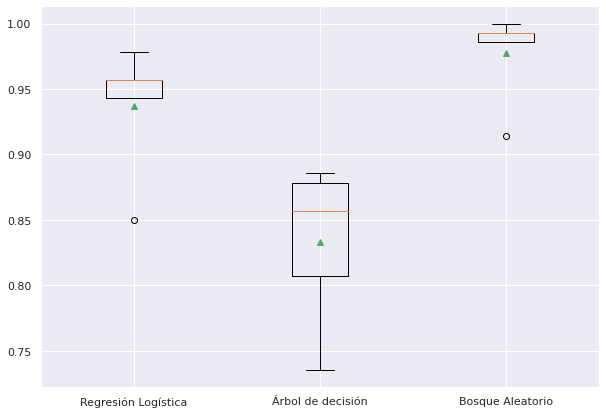

In [49]:
#DIAGRAMA DE CAJAS Y BIGOTES
sns.set(rc={'figure.figsize':(8,4)})

Aux = list()
for value in range (len(scores)):
  box = scores[value]['test_recall']
  Aux.append(scores[value]['test_recall'])
fig = plt.figure(figsize =(10, 7))
plt.boxplot(Aux, labels=modelosNombres, showmeans=True)

# TERMINA LA SECCIÓN PARA AGREGAR CÓDIGO.
#########################################################################

plt.show()

In [20]:
def mi_LearningCurvePlot(train_sizes, train_scores, val_scores):

    # Argumentos de entrada de la función mi_LearningCurvePlot:
    #      train_sizes : número de observaciones en el conjunto de entrenamiento.
    #      train_scores : Exactitud de cada partición en el proceso de Validación-Cruzada (VC) en los datos de entrenamiento.
    #                     La dimensión de este conjunto es (pxq) 
    #                                     donde p="número de particiones de manera incremental del conjunto de entrenamiento".
    #                                           q="número de particiones de VC" * "número de repeticiones de VC con RepitedStratifiedCV"
    #      val_scores : Exactitud de cada partición en el proceso de Validación-Cruzada en los datos de validación.
    #                   Es de la misma dimensión que los train_scores. 
    # Output: la salida es el gráfico con las curvas de aprendizaje.

    # Obtenemos los promedios y desviaciones estándar de cada renglón de los resultados de entrenamiento y validación
    # La dimensión de cada uno es p="número de particiones de manera incremental del conjunto de entrenamiento".
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    val_mean = np.mean(val_scores, axis=1)
    val_std = np.std(val_scores, axis=1)

    # Graficamos las curvas de aprendizaje incluyendo una región indicando la desviación estándar.
    plt.figure(figsize=(7,6))
    plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='Training')
    plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.1, color='blue')
    
    plt.plot(train_sizes, val_mean, color='red', marker='+', markersize=5, linestyle='--', label='Validation')
    plt.fill_between(train_sizes, val_mean + val_std, val_mean - val_std, alpha=0.1, color='red')
    
    plt.title('Curvas de Aprendizaje incrementando el tamaño de la muestra')
    plt.xlabel('Tamaño del conjunto de entrenamiento')
    plt.ylabel('Exactitud (accuracy)')
    plt.grid()
    plt.legend(loc='lower left')
    plt.show()

In [38]:
def mi_ModeloYCurvas(Xin):
       # Usemos primeramente el modelo de regresión logística
       # con sus parámetros predeterminados y semilla igual a 1.
       # Incremenetamos además el máximo de iteraciones para 
       # asegurar la convergencia de cada partición de la VC.

       modelo = LogisticRegression(max_iter=1000, random_state=1)

       ########################################################################
       # INICIA LA SECCIÓN PARA AGREGAR CÓDIGO.
   

       MODELS_pipe = Pipeline(steps = [('tranformacion', cols_Transformer),(modelosNombres[i], modelos[i])])


       # Ejercicio 2.2: Aplica validación cruzada estratificada y con repeticiones.
       #                Solo define los tres argumentos que se te indicaron.
       # Se espera una línea de código.

       mi_kfold = RepeatedStratifiedKFold(n_splits=5, n_repeats=3,random_state=7)


       # Ejercicio 2.3: Genera un arreglo con los 40 valores de los tamaños de muestra:
       # Se espera una línea de código.
       
       delta_train_sz = np.linspace(0.1, 1.0, 40)


       # Ejercicio 2.4:: Incluye los argumentos que se te indican a la 
       # función learning_curve. Solo sustituye "None" por el valor del
       # argumento adecuado en cada caso.

       tr_sizes, tr_scores, val_scores = learning_curve(estimator = MODELS_pipe ,    
                                                        X = Xtrain,
                                                        y = Ytrain.values.ravel(),
                                                        cv = mi_kfold ,
                                                        train_sizes = delta_train_sz)
       # Obtenemos el gráfico con las curvas de aprendizaje:
       mi_LearningCurvePlot(tr_sizes, tr_scores, val_scores)

Curvas de aprendizaje del modelo lineal:


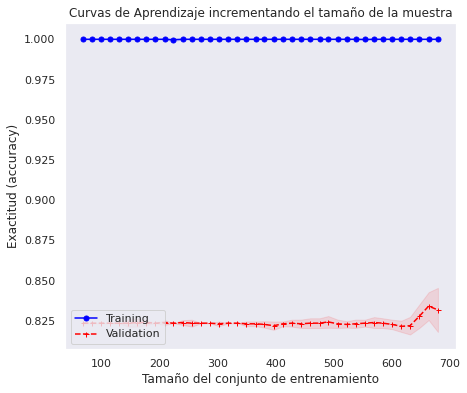

In [50]:
# Verifiquemos las curvas de entrenamiento que se obtienen con los datos de 
# entrenamiento y validación Xtv, para este primer modelo lineal:


print('Curvas de aprendizaje del modelo lineal:')
mi_ModeloYCurvas(X)

#**Ejercicio-5.**

In [ ]:
None

#**Ejercicio-6.**

In [ ]:
None

###**Fin de la Actividad de la semana 6.**